In [75]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Titanic.csv")

# Display the first few rows
print(df.head())

# Get dataset info
print(df.info())

# Get summary statistics of numerical columns
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [76]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
# Fill missing 'Age' values with the median (since it's a continuous feature)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop 'Cabin' column since it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Fill missing 'Embarked' values with the mode (most common value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check the missing values again to confirm
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\54600191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\54600191.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [78]:
# Extract titles from 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with 'Other'
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Create a family size feature (SibSp + Parch + 1 for the passenger)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Drop columns that we don’t need for modeling
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Convert 'Pclass' into a categorical variable
df['Pclass'] = df['Pclass'].astype('category')

# Check the updated DataFrame info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    category
 2   Sex         891 non-null    object  
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    891 non-null    object  
 8   Title       891 non-null    object  
 9   FamilySize  891 non-null    int64   
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 63.8+ KB
None


In [79]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [80]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Display the final cleaned data info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    category
 2   Age          891 non-null    float64 
 3   SibSp        891 non-null    int64   
 4   Parch        891 non-null    int64   
 5   Fare         891 non-null    float64 
 6   FamilySize   891 non-null    int64   
 7   Sex_male     891 non-null    bool    
 8   Embarked_Q   891 non-null    bool    
 9   Embarked_S   891 non-null    bool    
 10  Title_Miss   891 non-null    bool    
 11  Title_Mr     891 non-null    bool    
 12  Title_Mrs    891 non-null    bool    
 13  Title_Other  891 non-null    bool    
dtypes: bool(7), category(1), float64(2), int64(4)
memory usage: 49.0 KB
None


In [81]:
# Verify no missing values
print(df.isnull().sum())

# Display the first few rows of the cleaned data
print(df.head())


Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
FamilySize     0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Title_Miss     0
Title_Mr       0
Title_Mrs      0
Title_Other    0
dtype: int64
   Survived Pclass   Age  SibSp  Parch     Fare  FamilySize  Sex_male  \
0         0      3  22.0      1      0   7.2500           2      True   
1         1      1  38.0      1      0  71.2833           2     False   
2         1      3  26.0      0      0   7.9250           1     False   
3         1      1  35.0      1      0  53.1000           2     False   
4         0      3  35.0      0      0   8.0500           1      True   

   Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Other  
0       False        True       False      True      False        False  
1       False       False       False     False       True        False  
2       False        True        True     False      False        False  
3       False 

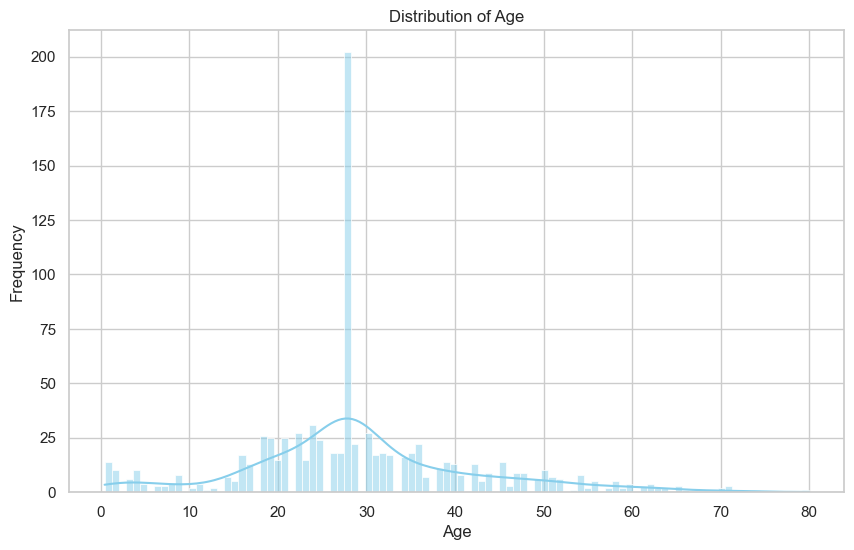

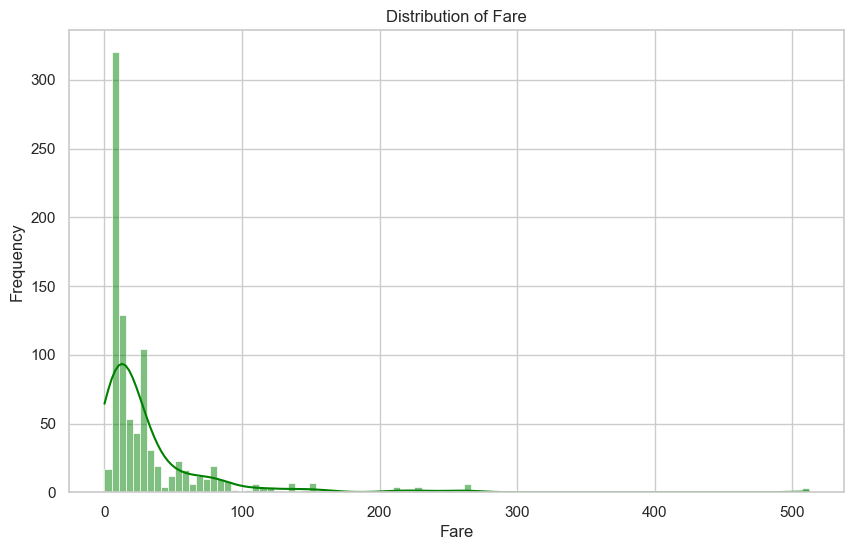

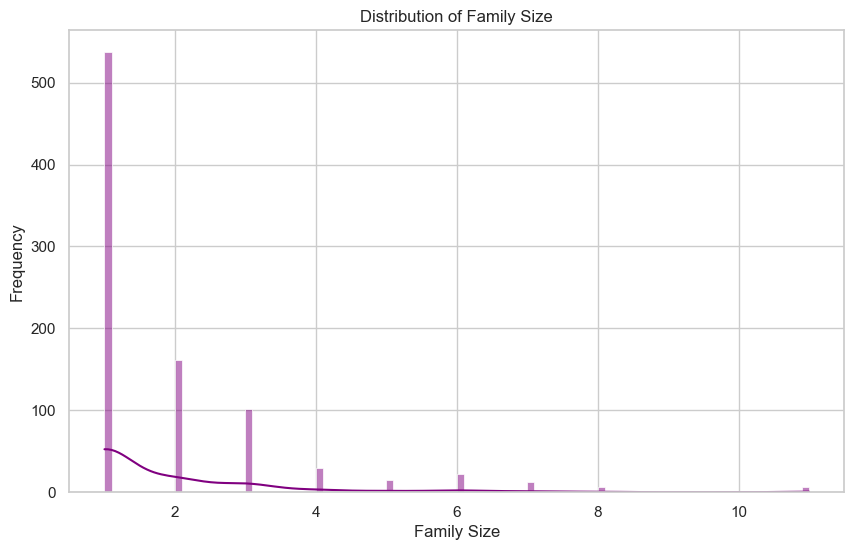

In [104]:
# Plotting distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=100, kde=True, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of 'FamilySize'
plt.figure(figsize=(10, 6))
sns.histplot(df['FamilySize'], bins=100, kde=True, color='purple')
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()


C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\3636240840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex_male', data=df, palette='pastel')


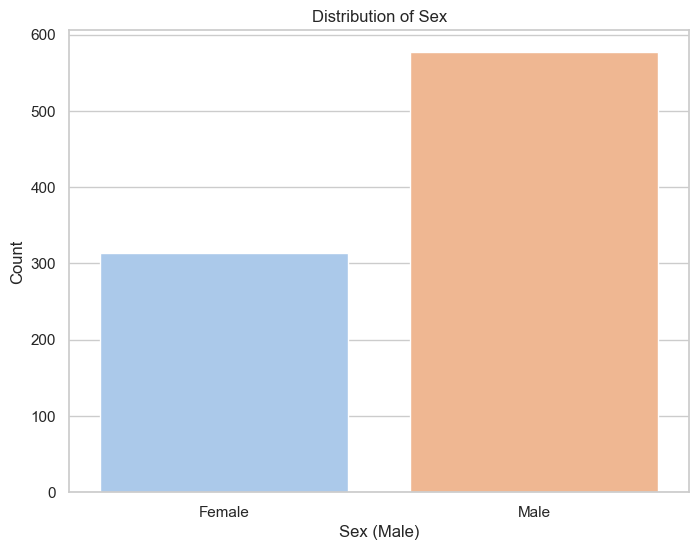

C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\3636240840.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set2')


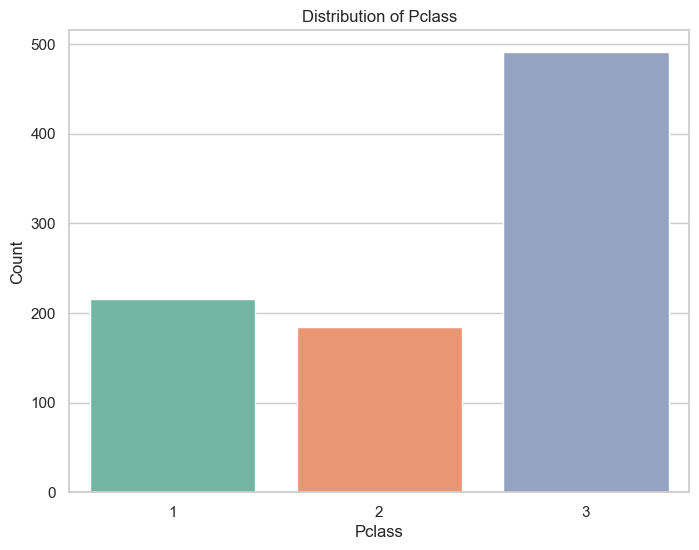

C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\3636240840.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked_S', data=df, palette='muted')


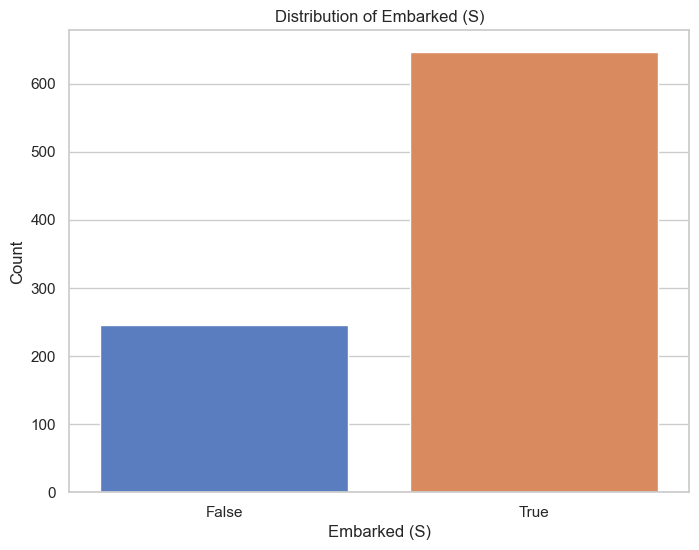

C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\3636240840.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Title_Miss', data=df, palette='coolwarm')


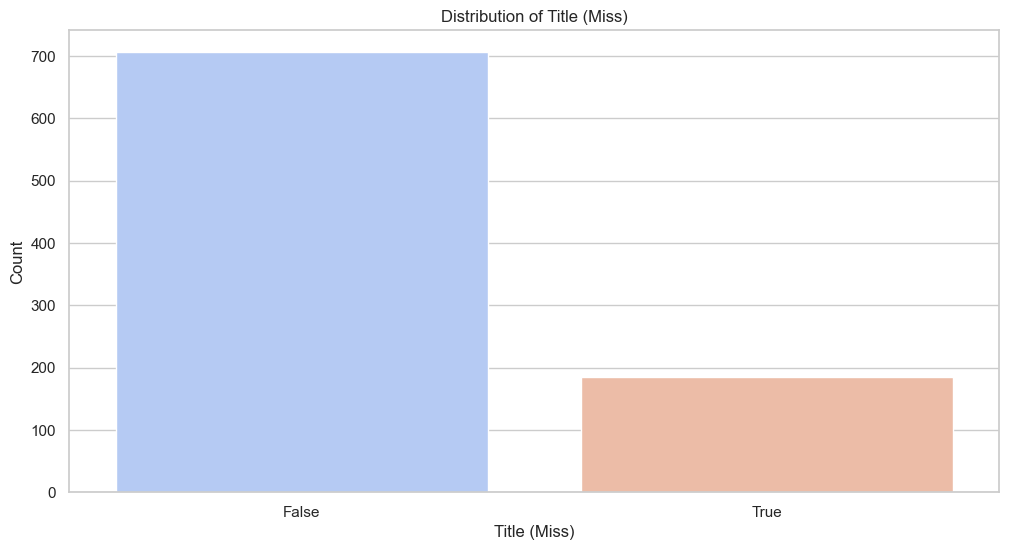

In [89]:
# Plotting distribution of 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex_male', data=df, palette='pastel')
plt.title('Distribution of Sex')
plt.xlabel('Sex (Male)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Plotting distribution of 'Pclass'
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Plotting distribution of 'Embarked'
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked_S', data=df, palette='muted')
plt.title('Distribution of Embarked (S)')
plt.xlabel('Embarked (S)')
plt.ylabel('Count')
plt.show()

# Plotting distribution of 'Title'
plt.figure(figsize=(12, 6))
sns.countplot(x='Title_Miss', data=df, palette='coolwarm')
plt.title('Distribution of Title (Miss)')
plt.xlabel('Title (Miss)')
plt.ylabel('Count')
plt.show()



C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\2625822779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Blues')


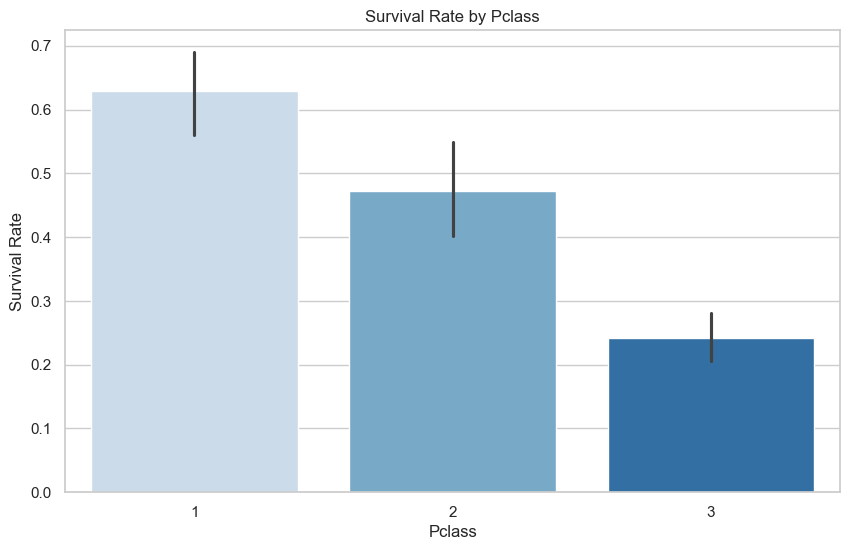

C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\2625822779.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex_male', y='Survived', data=df, palette='coolwarm')


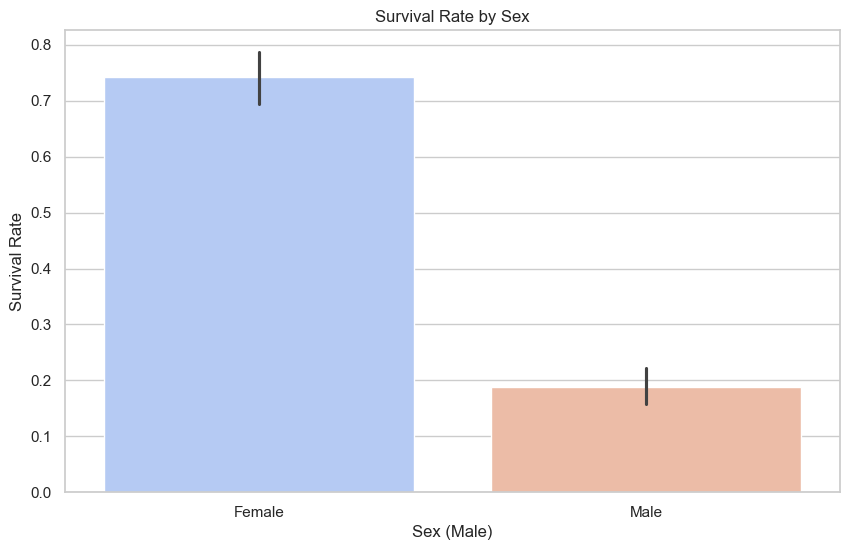

C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\2625822779.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, palette='Pastel1')


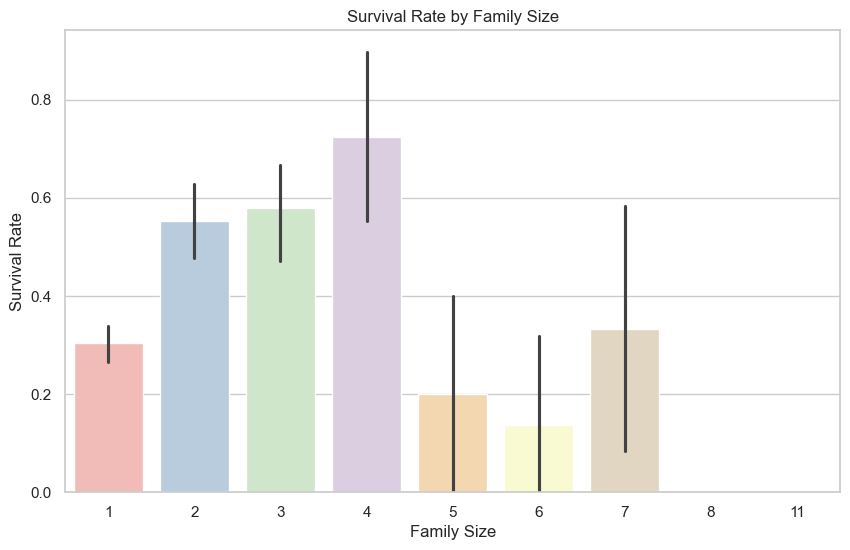

C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\2625822779.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked_S', y='Survived', data=df, palette='muted')


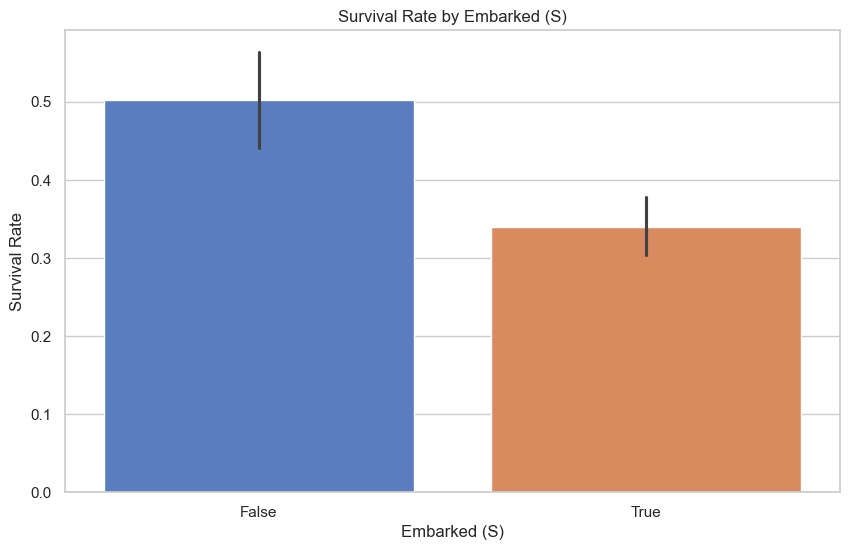

C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\2625822779.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title_Mrs', y='Survived', data=df, palette='Blues')


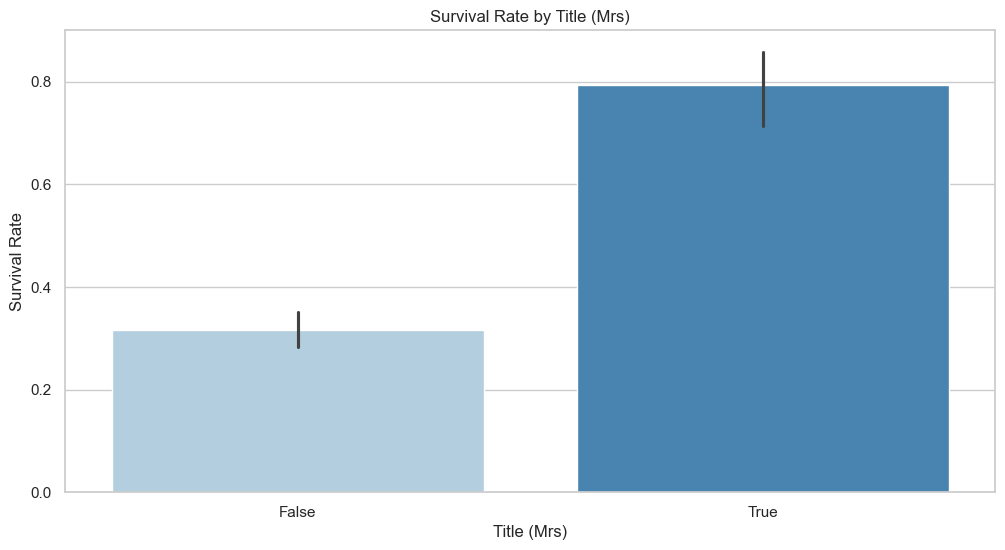

In [ ]:
# Plotting Survival Rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='Blues')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Plotting Survival Rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex_male', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (Male)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Plotting Survival Rate by Family Size
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df, palette='Pastel1')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Plotting Survival Rate by Embarked
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked_S', y='Survived', data=df, palette='muted')
plt.title('Survival Rate by Embarked (S)')
plt.xlabel('Embarked (S)')
plt.ylabel('Survival Rate')
plt.show()  

# Plotting Survival Rate by Title
plt.figure(figsize=(12, 6))
sns.barplot(x='Title_Mrs', y='Survived', data=df, palette='Blues')
plt.title('Survival Rate by Title (Mrs)')
plt.xlabel('Title (Mrs)')
plt.ylabel('Survival Rate')
plt.show()


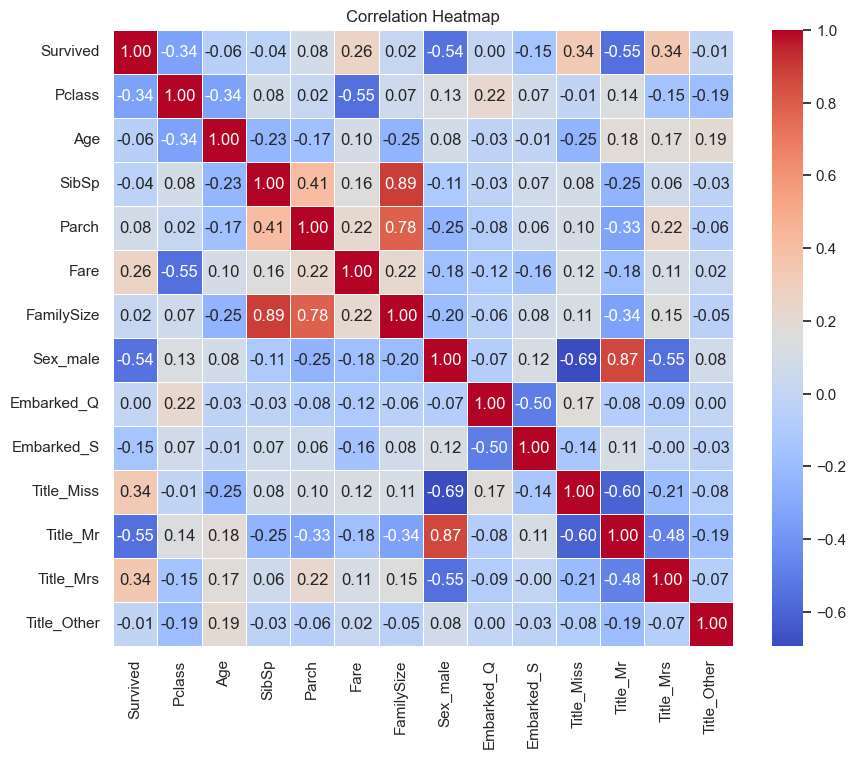

In [91]:
# Correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


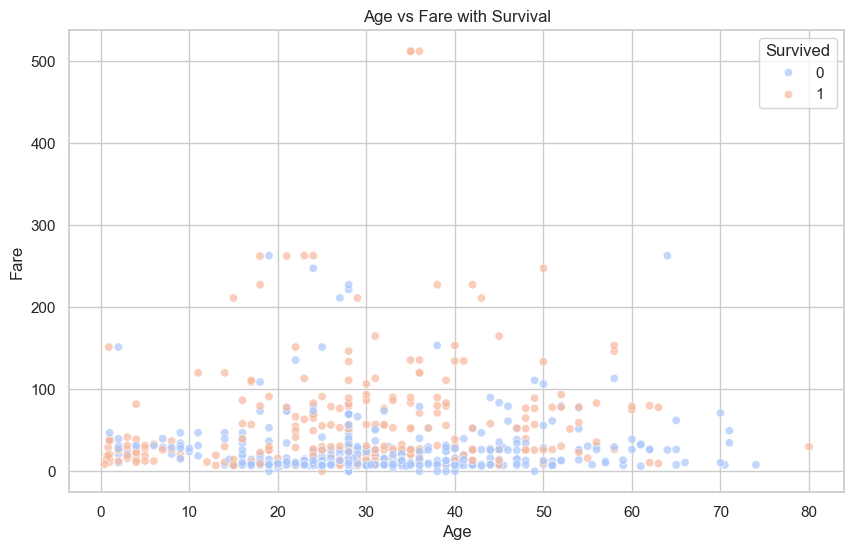

In [97]:
# Scatter plot of Age vs Fare with survival as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm', alpha=0.7)
plt.title('Age vs Fare with Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


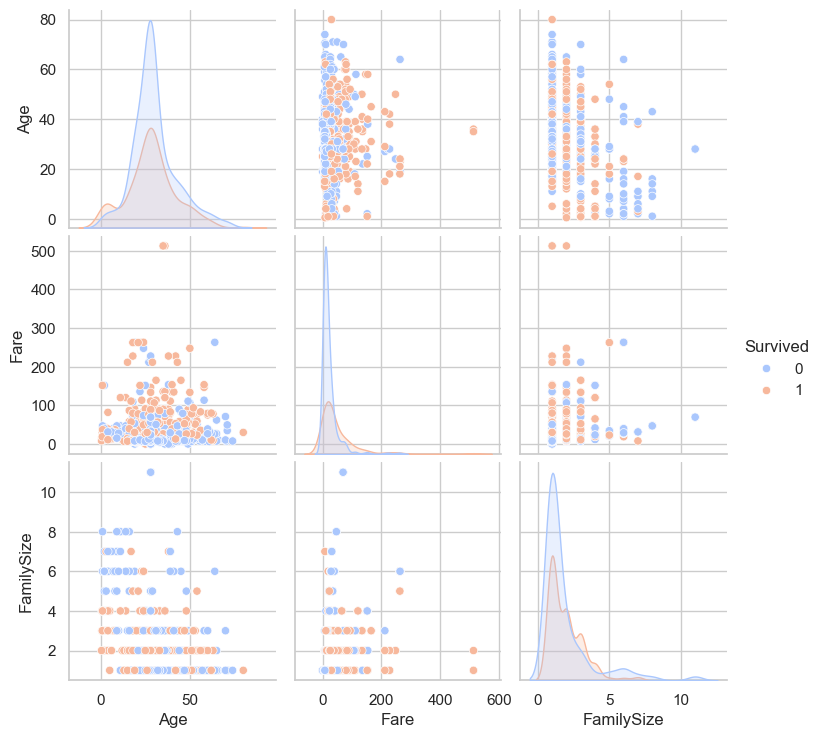

In [98]:
# Pairplot of key features
sns.pairplot(df[['Age', 'Fare', 'FamilySize', 'Survived']], hue='Survived', palette='coolwarm')
plt.show()


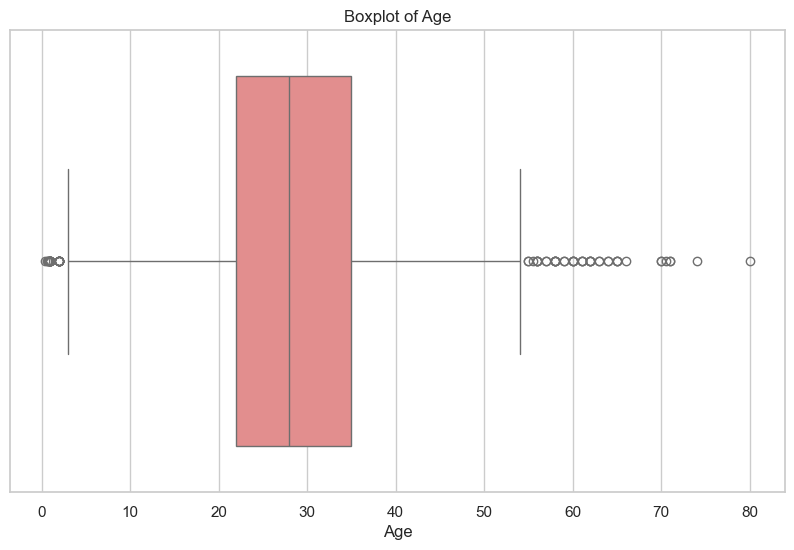

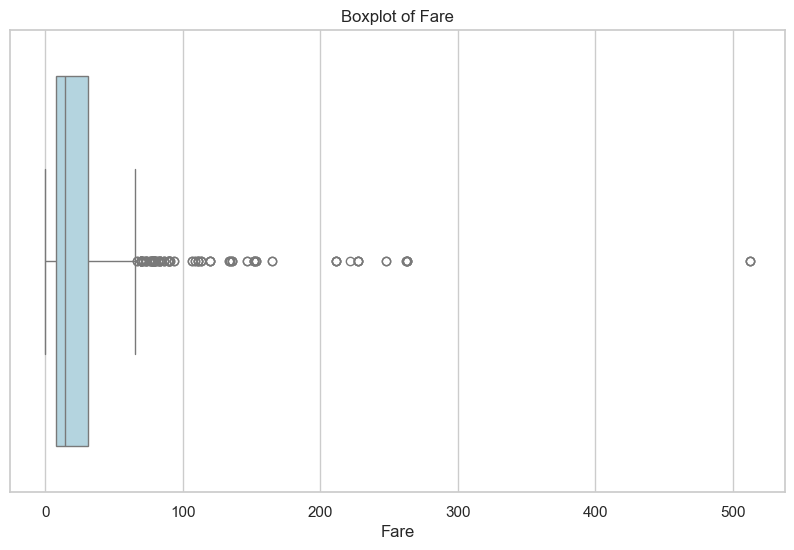

In [99]:
# Boxplot for Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'], color='lightcoral')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'], color='lightblue')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()


In [108]:
from sklearn.model_selection import train_test_split

# Features
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other']]

# Target variable
y = df['Survived']

# Handle missing values in the features
X['Age'].fillna(X['Age'].median(), inplace=True)  # Fill missing 'Age' values with median
X['Embarked_Q'].fillna(0, inplace=True)  # Fill missing 'Embarked_Q' with 0 (False)
X['Embarked_S'].fillna(1, inplace=True)  # Fill missing 'Embarked_S' with 1 (True)

# Splitting the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes of the datasets
print(X_train.shape, X_test.shape)


(712, 13) (179, 13)


C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\3250771958.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)  # Fill missing 'Age' values with median
C:\Users\shivh\AppData\Local\Temp\ipykernel_15264\3250771958.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].me

In [109]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the scaled data
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8101
Confusion Matrix:
[[88 17]
 [17 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [111]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('Random Forest Confusion Matrix:')
print(conf_matrix_rf)
print('Random Forest Classification Report:')
print(class_report_rf)


Random Forest Accuracy: 0.8324
Random Forest Confusion Matrix:
[[89 16]
 [14 60]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [112]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-validation
logreg_cv_scores = cross_val_score(logreg, X, y, cv=5)  # 5-fold cross-validation
print(f'Logistic Regression CV Scores: {logreg_cv_scores}')
print(f'Mean CV Score: {logreg_cv_scores.mean()}')

# Random Forest Cross-validation
rf_cv_scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
print(f'Random Forest CV Scores: {rf_cv_scores}')
print(f'Mean CV Score: {rf_cv_scores.mean()}')


C:\Users\shivh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shivh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Logistic Regression CV Scores: [0.82681564 0.80898876 0.78651685 0.79775281 0.83707865]
Mean CV Score: 0.8114305442219573
Random Forest CV Scores: [0.78212291 0.78651685 0.84831461 0.7752809  0.79213483]
Mean CV Score: 0.7968740192078337


In [113]:
from sklearn.model_selection import GridSearchCV

# Parameters for GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with Random Forest model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.8370977082816249


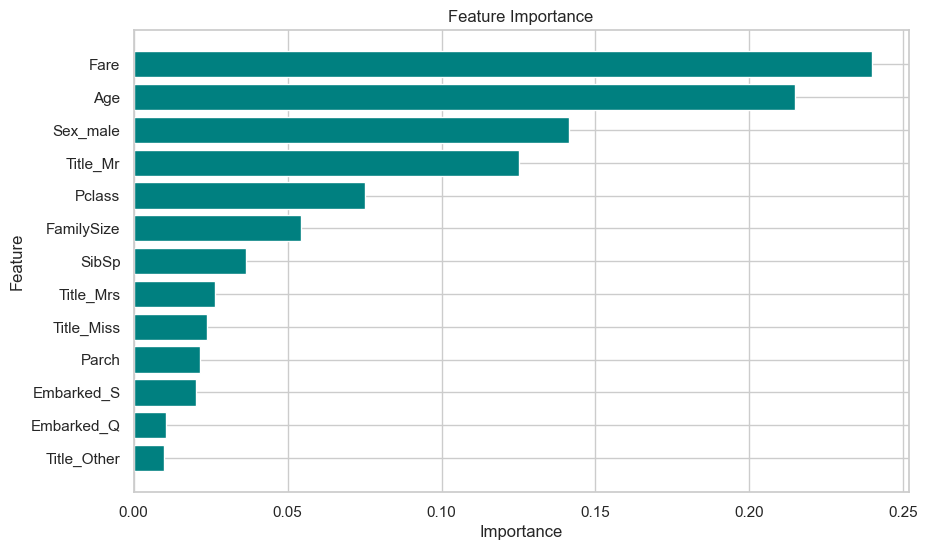

In [114]:
# Get feature importance from Random Forest
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_idx = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importances[sorted_idx], color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
